IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

INSERTING THE CSV FILE

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


DATA EXPLORING :

    DATA UNDERSTANDING & CLEANING

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [10]:
print(df.drop(['Cabin'], axis=1, inplace=True))

None


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
print(df.duplicated().sum())

0


In [13]:
df['Sex'] = df['Sex'].replace("male", 1)
df['Sex'] = df['Sex'].replace("female", 0)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\3074104010.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace("female", 0)


In [14]:
df["Embarked"] = df["Embarked"].replace("S", 0)
df["Embarked"] = df["Embarked"].replace("C", 1)
df["Embarked"] = df["Embarked"].replace("Q", 2)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\3748634860.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Embarked"] = df["Embarked"].replace("Q", 2)


In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

SPLITING THE DATASET

In [16]:
x=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

In [17]:
x.shape, y.shape

((891, 7), (891,))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((179, 7), (179,), (712, 7), (712,))

BUILDING LOGISTIC REGRESSION MODEL

In [20]:
lr= LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


TRAIN THE MODEL

In [21]:
y_train_pred=lr.predict(x_train)

In [22]:
y_train_pred.shape, y_train.shape

((712,), (712,))

TEST THE MODEL

In [23]:
y_test_pred=lr.predict(x_test)

In [24]:
y_test_pred.shape, y_test.shape

((179,), (179,))

VISUALIZE THE TRAIN MODEL

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\1556595060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=train_counts, palette='Greens')


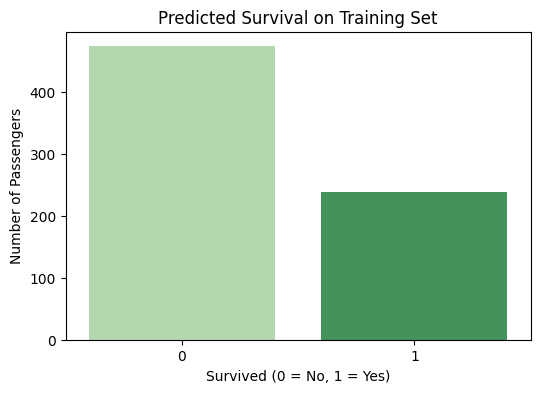

In [25]:
train_counts = np.bincount(y_train_pred)
plt.figure(figsize=(6,4))
sns.barplot(x=[0, 1], y=train_counts, palette='Greens')
plt.title("Predicted Survival on Training Set")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

VISUALIZE THE TEST MODEL

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_8508\2272863851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=test_counts, palette='Blues')


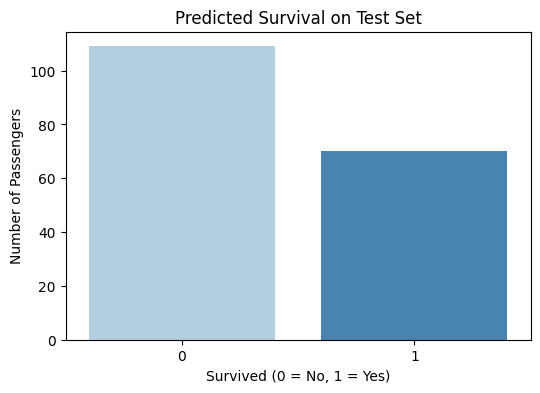

In [26]:
test_counts = np.bincount(y_test_pred)
plt.figure(figsize=(6,4))
sns.barplot(x=[0, 1], y=test_counts, palette='Blues')
plt.title("Predicted Survival on Test Set")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

EVALUATE THE TRAIN MODEL

In [27]:
print("Accuracy = ",accuracy_score(y_train, y_train_pred))

Accuracy =  0.8019662921348315


In [28]:
print("confusion_matrix = ",confusion_matrix(y_train, y_train_pred))

confusion_matrix =  [[388  56]
 [ 85 183]]


In [29]:
print("classification_report = ",classification_report(y_train, y_train_pred))

classification_report =                precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



EVALUATE THE TEST MODEL

In [30]:
print("Accuracy = ", accuracy_score(y_test, y_test_pred))

Accuracy =  0.7988826815642458


In [31]:
print("confusion_matrix = ", confusion_matrix(y_test, y_test_pred))

confusion_matrix =  [[89 16]
 [20 54]]


In [32]:
print("classification_report = ", classification_report(y_test, y_test_pred))

classification_report =                precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



COMPARING ACTUAL VALUE vs PREDICTED VALUE

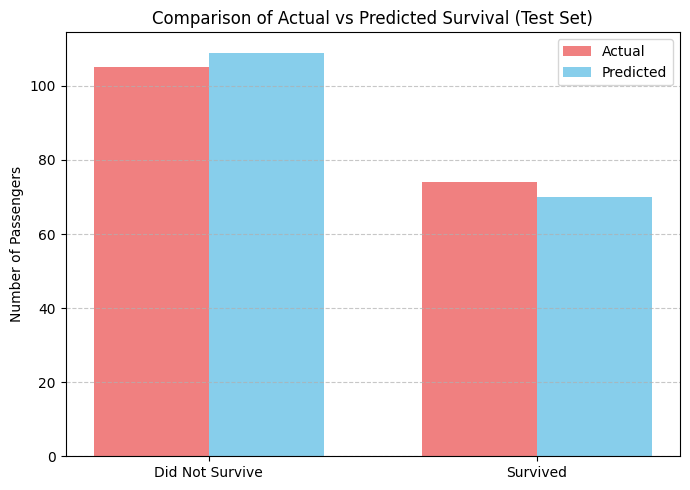

In [33]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred
})

actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

labels = ['Did Not Survive', 'Survived']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, actual_counts, width, label='Actual', color='lightcoral')
plt.bar(x + width/2, predicted_counts, width, label='Predicted', color='skyblue')
plt.ylabel('Number of Passengers')
plt.title('Comparison of Actual vs Predicted Survival (Test Set)')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
